In [29]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

In [30]:
def get_soup(url):
    r = requests.get(url)
    soup = BeautifulSoup(r.text,'html.parser')
    return soup

In [31]:
reviews = []
def get_review(soup): 
    item = soup.find_all('div',{'data-hook':'review'})
    for x in item:
        body = x.find('span',{'data-hook':'review-body'}).text.strip()
        reviews.append(body)

In [32]:
for x in range(1,10000):
    soup = get_soup(f'https://www.amazon.in/Apple-iPhone-13-128GB-Midnight/product-reviews/B09G9HD6PD/ref=cm_cr_arp_d_viewopt_srt?ie=UTF8&reviewerType=all_reviews&sortBy=helpful&pageNumber={x}')
    get_review(soup)
    if not soup.find('li',{'class':'a-disabled a-last'}):
        pass
    else:
        break

In [33]:
reviews = pd.DataFrame(reviews,columns=['reviews'])
reviews

,reviews
0,Have switched to iPhone from android. The display and UI/UX is just uncomparable. Loving every part of it.
1,Great product
2,Amazing product.
3,"Great Product, I have been using since more than 8 months . Superb Camera & Audio Quality is great.Display is what something I cant describe its great. This is my secondary i am only using for work & finance."
4,"I am very pleased that I bought the original iphone 13.Just shifted from Android to iOS .. The new iphone 13 is a great phone with a lot of improvements. It has the best camera on the market..it works good in low light, the software is much improved, and the battery life is long lasting.Got this for - 66 K"
...,...
326,"The smartphone marketplace has changed drastically over the span of the past few years. Over the years, it has become more competitive than ever before with a lot of smartphone makers launching their flagship devices every six months. Amid these challenging times Apple, like a bunch of other companies, has maintained a yearly update cycle for its iPhones. In this series, the company, as is customary, announced the iPhone 13 as its successor to last year’s iPhone 12.The newly launched iPhone 13 delivers minor upgrades over the iPhone 12, which includes a smarter camera, a brighter display, a bigger battery and of course, a more advanced processor to name a few. Then there are features like a smaller notch and a less pronounced rear camera module that might seem insignificant compared to the mentioned features but make a world of difference when it comes to usage. Sure, it’s a tad bit heavier than the iPhone 12 but if you compare it with some of the older iPhone models, like the iPhone 11 or the iPhone XR that I have been using, for what seems like aeons now, you will be grateful for everything that the iPhone 13 offers."
327,I always wanted to buy an iPhone this one is just made for me it's has a very good camera and I just love the look.If you are going for iphone than I highly recommend this phone to you other than other than 12 or 11.
328,Best phone ever❤️
329,Iphone 13 256 gb variant purchased from reliance digital really value for money phone especially battery back up is mind blowing overall good phone.


In [34]:
reviews.to_excel('Iphone13_reviews.xlsx')

In [35]:
df = pd.read_excel('Iphone13_reviews.xlsx',index_col=0)

In [36]:
pd.set_option('max_colwidth',0)
df

,reviews
0,Have switched to iPhone from android. The display and UI/UX is just uncomparable. Loving every part of it.
1,Great product
2,Amazing product.
3,"Great Product, I have been using since more than 8 months . Superb Camera & Audio Quality is great.Display is what something I cant describe its great. This is my secondary i am only using for work & finance."
4,"I am very pleased that I bought the original iphone 13.Just shifted from Android to iOS .. The new iphone 13 is a great phone with a lot of improvements. It has the best camera on the market..it works good in low light, the software is much improved, and the battery life is long lasting.Got this for - 66 K"
...,...
326,"The smartphone marketplace has changed drastically over the span of the past few years. Over the years, it has become more competitive than ever before with a lot of smartphone makers launching their flagship devices every six months. Amid these challenging times Apple, like a bunch of other companies, has maintained a yearly update cycle for its iPhones. In this series, the company, as is customary, announced the iPhone 13 as its successor to last year’s iPhone 12.The newly launched iPhone 13 delivers minor upgrades over the iPhone 12, which includes a smarter camera, a brighter display, a bigger battery and of course, a more advanced processor to name a few. Then there are features like a smaller notch and a less pronounced rear camera module that might seem insignificant compared to the mentioned features but make a world of difference when it comes to usage. Sure, it’s a tad bit heavier than the iPhone 12 but if you compare it with some of the older iPhone models, like the iPhone 11 or the iPhone XR that I have been using, for what seems like aeons now, you will be grateful for everything that the iPhone 13 offers."
327,I always wanted to buy an iPhone this one is just made for me it's has a very good camera and I just love the look.If you are going for iphone than I highly recommend this phone to you other than other than 12 or 11.
328,Best phone ever❤️
329,Iphone 13 256 gb variant purchased from reliance digital really value for money phone especially battery back up is mind blowing overall good phone.


In [37]:
import pandas as pd
import numpy as np

In [38]:
aff = pd.read_csv('Afinn.csv', encoding = 'latin_1')

In [39]:
aff

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [40]:
df

,reviews
0,Have switched to iPhone from android. The display and UI/UX is just uncomparable. Loving every part of it.
1,Great product
2,Amazing product.
3,"Great Product, I have been using since more than 8 months . Superb Camera & Audio Quality is great.Display is what something I cant describe its great. This is my secondary i am only using for work & finance."
4,"I am very pleased that I bought the original iphone 13.Just shifted from Android to iOS .. The new iphone 13 is a great phone with a lot of improvements. It has the best camera on the market..it works good in low light, the software is much improved, and the battery life is long lasting.Got this for - 66 K"
...,...
326,"The smartphone marketplace has changed drastically over the span of the past few years. Over the years, it has become more competitive than ever before with a lot of smartphone makers launching their flagship devices every six months. Amid these challenging times Apple, like a bunch of other companies, has maintained a yearly update cycle for its iPhones. In this series, the company, as is customary, announced the iPhone 13 as its successor to last year’s iPhone 12.The newly launched iPhone 13 delivers minor upgrades over the iPhone 12, which includes a smarter camera, a brighter display, a bigger battery and of course, a more advanced processor to name a few. Then there are features like a smaller notch and a less pronounced rear camera module that might seem insignificant compared to the mentioned features but make a world of difference when it comes to usage. Sure, it’s a tad bit heavier than the iPhone 12 but if you compare it with some of the older iPhone models, like the iPhone 11 or the iPhone XR that I have been using, for what seems like aeons now, you will be grateful for everything that the iPhone 13 offers."
327,I always wanted to buy an iPhone this one is just made for me it's has a very good camera and I just love the look.If you are going for iphone than I highly recommend this phone to you other than other than 12 or 11.
328,Best phone ever❤️
329,Iphone 13 256 gb variant purchased from reliance digital really value for money phone especially battery back up is mind blowing overall good phone.


In [41]:
df['reviews'] = df['reviews'].astype('str') 

In [42]:
review1 = [x.strip().lower() for x in df['reviews']]
review_1 = [x for x in review1 if x]

In [43]:
review_1 == review1

True

In [44]:
review_1

['have switched to iphone from android. the display and ui/ux is just uncomparable. loving every part of it.',
 'great product',
 'amazing product.',
 'great product, i have been using since more than 8 months . superb camera & audio quality is great.display is what something i cant describe its great. this is my secondary i am only using for work & finance.',
 'i am very pleased that i bought the original iphone 13.just shifted from android to ios .. the new iphone 13 is a great phone with a lot of improvements. it has the best camera on the market..it works good in low light, the software is much improved, and the battery life is long lasting.got this for - 66 k',
 "good things1. camera as always amazing ( cinematic vedio is wow).2. battery performance has improved tremendously3. no lags4. size is good , good for watching movies.5. look is above average.not good1. charger not available ( whatever logic company gives , it should be available, one have a buy ) , people buying iphone ca

In [45]:
import nltk

In [46]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Yash
[nltk_data]     Bhosale\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [47]:
from nltk.tokenize import TweetTokenizer

In [48]:
from nltk import tokenize

In [49]:
tt = TweetTokenizer(strip_handles= True)

In [50]:
clean_sent = tt.tokenize(' '.join(review_1))
' '.join(clean_sent)

'have switched to iphone from android . the display and ui / ux is just uncomparable . loving every part of it . great product amazing product . great product , i have been using since more than 8 months . superb camera & audio quality is great.display is what something i cant describe its great . this is my secondary i am only using for work & finance . i am very pleased that i bought the original iphone 13.just shifted from android to ios .. the new iphone 13 is a great phone with a lot of improvements . it has the best camera on the market .. it works good in low light , the software is much improved , and the battery life is long lasting.got this for - 66 k good things 1 . camera as always amazing ( cinematic vedio is wow ) . 2 . battery performance has improved tremendously 3 . no lags 4 . size is good , good for watching movies . 5 . look is above average.not good 1 . charger not available ( whatever logic company gives , it should be available , one have a buy ) , people buying 

In [51]:
clean_sent = tokenize.sent_tokenize(' '.join(clean_sent))
clean_sent

['have switched to iphone from android .',
 'the display and ui / ux is just uncomparable .',
 'loving every part of it .',
 'great product amazing product .',
 'great product , i have been using since more than 8 months .',
 'superb camera & audio quality is great.display is what something i cant describe its great .',
 'this is my secondary i am only using for work & finance .',
 'i am very pleased that i bought the original iphone 13.just shifted from android to ios .. the new iphone 13 is a great phone with a lot of improvements .',
 'it has the best camera on the market .. it works good in low light , the software is much improved , and the battery life is long lasting.got this for - 66 k good things 1 . camera as always amazing ( cinematic vedio is wow ) .',
 '2 . battery performance has improved tremendously 3 . no lags 4 . size is good , good for watching movies .',
 "5 . look is above average.not good 1 . charger not available ( whatever logic company gives , it should be avai

In [52]:
sent = pd.DataFrame(clean_sent, columns= ['Sentences'])
sent

,Sentences
0,have switched to iphone from android .
1,the display and ui / ux is just uncomparable .
2,loving every part of it .
3,great product amazing product .
4,"great product , i have been using since more than 8 months ."
...,...
476,then there are features like a smaller notch and a less pronounced rear camera module that might seem insignificant compared to the mentioned features but make a world of difference when it comes to usage .
477,"sure , it ’ s a tad bit heavier than the iphone 12 but if you compare it with some of the older iphone models , like the iphone 11 or the iphone xr that i have been using , for what seems like aeons now , you will be grateful for everything that the iphone 13 offers ."
478,i always wanted to buy an iphone this one is just made for me it's has a very good camera and i just love the look.if you are going for iphone than i highly recommend this phone to you other than other than 12 or 11 . best phone ever ❤ ️ iphone 13 256 gb variant purchased from reliance digital really value for money phone especially battery back up is mind blowing overall good phone .
479,the media could not be loaded .


In [62]:
affinity = aff.set_index('word')['value'].to_dict()

In [63]:
affinity

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [83]:
import spacy

In [84]:
nlp = spacy.load('en_core_web_md')

In [96]:
def cal_score(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for x in sentence:
            sent_score += affinity.get(x.lemma_,0)
    return sent_score

In [97]:
cal_score('sad')

-2

In [98]:
sent['Sentiment'] = sent['Sentences'].apply(cal_score)

In [87]:
sent

,Sentences
0,have switched to iphone from android .
1,the display and ui / ux is just uncomparable .
2,loving every part of it .
3,great product amazing product .
4,"great product , i have been using since more than 8 months ."
...,...
476,then there are features like a smaller notch and a less pronounced rear camera module that might seem insignificant compared to the mentioned features but make a world of difference when it comes to usage .
477,"sure , it ’ s a tad bit heavier than the iphone 12 but if you compare it with some of the older iphone models , like the iphone 11 or the iphone xr that i have been using , for what seems like aeons now , you will be grateful for everything that the iphone 13 offers ."
478,i always wanted to buy an iphone this one is just made for me it's has a very good camera and i just love the look.if you are going for iphone than i highly recommend this phone to you other than other than 12 or 11 . best phone ever ❤ ️ iphone 13 256 gb variant purchased from reliance digital really value for money phone especially battery back up is mind blowing overall good phone .
479,the media could not be loaded .


In [88]:
sent['words'] = sent['Sentences'].str.split().apply(len)

In [89]:
sent

,Sentences,words
0,have switched to iphone from android .,7
1,the display and ui / ux is just uncomparable .,10
2,loving every part of it .,6
3,great product amazing product .,5
4,"great product , i have been using since more than 8 months .",13
...,...,...
476,then there are features like a smaller notch and a less pronounced rear camera module that might seem insignificant compared to the mentioned features but make a world of difference when it comes to usage .,36
477,"sure , it ’ s a tad bit heavier than the iphone 12 but if you compare it with some of the older iphone models , like the iphone 11 or the iphone xr that i have been using , for what seems like aeons now , you will be grateful for everything that the iphone 13 offers .",59
478,i always wanted to buy an iphone this one is just made for me it's has a very good camera and i just love the look.if you are going for iphone than i highly recommend this phone to you other than other than 12 or 11 . best phone ever ❤ ️ iphone 13 256 gb variant purchased from reliance digital really value for money phone especially battery back up is mind blowing overall good phone .,77
479,the media could not be loaded .,7


In [99]:
sent[sent['Sentiment'] == sent['Sentiment'].min()]

,Sentences,words,Sentiment
160,3 . oneplus device also suffered from screenburn.having switched the battery life is sorted and the phone does not have any heating issues but iphones lack basic features such as1 .,31,-4
463,3 . oneplus device also suffered from screenburn.having switched the battery life is sorted and the phone does not have any heating issues but iphones lack basic features such as1 .,31,-4


In [ ]:
sent[sent['Sentiment'] == sent['Sentiment'].max()]

In [91]:
pd.options.display.max_colwidth = 1000

In [92]:
import seaborn as sns

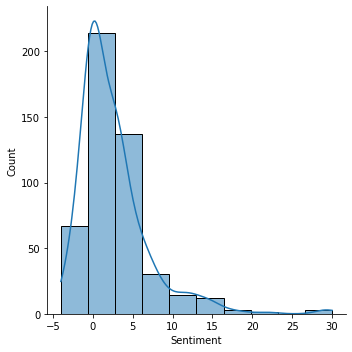

In [100]:
sns.displot(sent['Sentiment'], kde = True, bins = 10)

<AxesSubplot:xlabel='words', ylabel='Sentiment'>

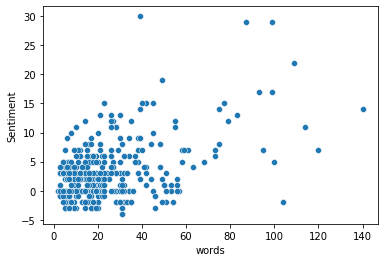

In [101]:
sns.scatterplot(y='Sentiment',x='words',data=sent)

In [102]:
sent[sent['Sentiment'] > 5]

,Sentences,words,Sentiment
3,great product amazing product .,5,7
5,superb camera & audio quality is great.display is what something i cant describe its great .,16,8
7,i am very pleased that i bought the original iphone 13.just shifted from android to ios .. the new iphone 13 is a great phone with a lot of improvements .,31,8
8,"it has the best camera on the market .. it works good in low light , the software is much improved , and the battery life is long lasting.got this for - 66 k good things 1 . camera as always amazing ( cinematic vedio is wow ) .",49,19
9,"2 . battery performance has improved tremendously 3 . no lags 4 . size is good , good for watching movies .",22,6
...,...,...,...
459,it ’ s a great upgrade … camera is good .. the media could not be loaded .,18,6
472,"camera is ok charging speed is very slow even with 12 watt charger if your shifting from andriod in my opinion it ’ s not worth it this phone has amazing features idk why people hate it this deserves to be liked more as the phone even has cinematic mode perfect for people who make movies excellent , there is no phone like iphone the smartphone marketplace has changed drastically over the span of the past few years .",79,12
477,"sure , it ’ s a tad bit heavier than the iphone 12 but if you compare it with some of the older iphone models , like the iphone 11 or the iphone xr that i have been using , for what seems like aeons now , you will be grateful for everything that the iphone 13 offers .",59,7
478,i always wanted to buy an iphone this one is just made for me it's has a very good camera and i just love the look.if you are going for iphone than i highly recommend this phone to you other than other than 12 or 11 . best phone ever ❤ ️ iphone 13 256 gb variant purchased from reliance digital really value for money phone especially battery back up is mind blowing overall good phone .,77,15
